<p align="center">
Universidade Federal de Alagoas</br>

Instituto de Computação</br>

</p>

#Trabalho Prático AB2

Disciplina: Sistemas Distribuídos

Semestre letivo: 2017.1

Professor: André Lage Freitas

## Especificação

**Importante**. Leia atentamente essa seção pois só serão aceitos trabalhos que obedecerem as a especificações a seguir. 

Baseado(a) no exemplo a seguir de implementação do B-multicast em Julia, façam os exercícios descritos nesse documento.

In [2]:
function B_multicastAssync(g,m,B_deliver)
    for p in g
        remotecall(p, B_deliver, m)
    end
end

# Adding 3 processes (workers)
addprocs(10)

# My group is composed by all workers
g = workers()

# Multicasting "oi!" message to group `g` by assuming `println` as B_deliver function.
B_multicastAssync(g,"oi!",println)

	From worker 3:	oi!
	From worker 2:	oi!
	From worker 4:	oi!
	From worker 6:	oi!
	From worker 9:	oi!
	From worker 8:	oi!
	From worker 11:	oi!
	From worker 10:	oi!
	From worker 7:	oi!
	From worker 5:	oi!


### Exercício 1: Sincronismo (2,0 pontos)

Adicione 10 processos com o comando `addprocs` abaixo. 

_Atenção_: sua instalação local de Julia pode não conseguir adicionar 10 processos, use a [JuliaBox](https://juliabox.com).

In [4]:
addprocs(10)


10-element Array{Any,1}:
 32
 33
 34
 35
 36
 37
 38
 39
 40
 41

Modifique a implementação do B-multicast para utilizar communicação síncrona.

In [5]:
#B-Multicast Sync

function B_multicastSync(g,m,B_deliver)
    for p in g
        remotecall_wait(p, B_deliver, m)
    end
end

B_multicastSync (generic function with 1 method)

Execute as duas versões do B-multicast (síncrona e assíncrona) e compare as saídas.

In [6]:
#Variable g update
g = workers()

# Multicasting "oi!" message to group `g` by assuming `println` as B_deliver function.
## Synchronous
println("Syncronous Executation")
B_multicastSync(g, "oi!", println)
println("##### END #####")
#Variable g update
g = workers()
## Asynchronous
println("Assyncronous Executation")
B_multicastAssync(g, "oi!", println)
println("##### END #####")

Syncronous Executation
	From worker 2:	oi!
	From worker 3:	oi!
	From worker 4:	oi!
	From worker 5:	oi!
	From worker 6:	oi!
	From worker 7:	oi!
	From worker 8:	oi!
	From worker 9:	oi!
	From worker 10:	oi!
	From worker 11:	oi!
	From worker 12:	oi!
	From worker 13:	oi!
	From worker 14:	oi!
	From worker 15:	oi!
	From worker 16:	oi!
	From worker 17:	oi!
	From worker 18:	oi!
	From worker 19:	oi!
	From worker 20:	oi!
	From worker 21:	oi!
	From worker 22:	oi!
	From worker 23:	oi!
	From worker 24:	oi!
	From worker 25:	oi!
	From worker 26:	oi!
	From worker 27:	oi!
	From worker 28:	oi!
	From worker 29:	oi!
	From worker 30:	oi!
	From worker 31:	oi!
	From worker 32:	oi!
	From worker 33:	oi!
	From worker 34:	oi!
	From worker 35:	oi!
	From worker 36:	oi!
	From worker 37:	oi!
	From worker 38:	oi!
	From worker 39:	oi!
	From worker 40:	oi!
	From worker 41:	oi!
##### END #####
Assyncronous Executation
	From worker 3:	oi!
	From worker 4:	oi!
	From worker 9:	oi!
	From worker 11:	oi!
	From worker 6:	oi!
	Fr

A ordem das mensagens das saídas foram as mesmas para ambas versões do B-multicast? Por quê?

**Resposta**: _Não, na versão síncrona tem-se a garantia da ordem dos processos da lista devido a espera de conclusão de cada processo. Já na versão assíncrona não existe essa garantia pois a impressão da saída depende do tempo que cada processo demora para terminar._

### Exercício 2: Análise de desempenho do B-multicast (2,0 pontos)

Meça o tempo de execução duas versões do B-multicast (síncrona e assíncrona). Dica: utilize a macro `@time`.

* Execute 50 vezes essa medição e construa um gráfico em forma de barras:
	* cada barra representando cada versão do B-multicast;
	* calcule e coloque no gráfico o [intervalo de confiança](https://en.wikipedia.org/wiki/Confidence_interval) com nível de 95%.

_A função a seguir retorna a lista com os tempos de execução da função parâmetro que for passada na mesma._

In [8]:
function measureTime(multicast)
    g = workers()
    total_time = Float64[]
    
    for i = 1:50
        print ("Interaction ")
        println (i)
        tic()
        multicast(g, "oi!", println)
        push!(total_time, toc())
    end
    return total_time
end

measureTime (generic function with 1 method)

_A seguir temos a ocorrência 50 execuções de um B-Multicast Síncrono_

In [30]:
sync_B_mc = measureTime(B_multicastSync)

sync_mean_value = mean(sync_B_mc)
sync_sd_value = stdm(sync_B_mc, sync_mean_value)
sync_margin_value = 1.96*(sync_sd_value/sqrt(50))

sync_max_value_ci = sync_mean_value + sync_margin_value
println(sync_max_value_ci)
sync_min_value_ci = sync_mean_value - sync_margin_value
println(sync_min_value_ci)

sync_B_mc_total_time = sum(sync_B_mc)

Interaction 1
	From worker 3:	oi!
	From worker 4:	oi!
	From worker 5:	oi!
	From worker 6:	oi!
	From worker 7:	oi!
	From worker 8:	oi!
	From worker 9:	oi!
	From worker 11:	oi!
	From worker 14:	oi!
	From worker 15:	oi!
	From worker 16:	oi!
	From worker 17:	oi!
	From worker 18:	oi!
	From worker 19:	oi!
	From worker 20:	oi!
	From worker 22:	oi!
	From worker 23:	oi!
	From worker 24:	oi!
	From worker 27:	oi!
	From worker 28:	oi!
	From worker 31:	oi!
	From worker 33:	oi!
	From worker 34:	oi!
	From worker 35:	oi!
	From worker 39:	oi!
	From worker 41:	oi!
elapsed time: 0.101765211 seconds
Interaction 2
	From worker 3:	oi!
	From worker 4:	oi!
	From worker 5:	oi!
	From worker 6:	oi!
	From worker 7:	oi!
	From worker 8:	oi!
	From worker 9:	oi!
	From worker 11:	oi!
	From worker 14:	oi!
	From worker 15:	oi!
	From worker 16:	oi!
	From worker 17:	oi!
	From worker 18:	oi!
	From worker 19:	oi!
	From worker 20:	oi!
	From worker 22:	oi!
	From worker 23:	oi!
	From worker 24:	oi!
	From worker 27:	oi!
	From w

	From worker 18:	oi!
	From worker 19:	oi!
	From worker 20:	oi!
	From worker 22:	oi!
	From worker 23:	oi!
	From worker 24:	oi!
	From worker 27:	oi!
	From worker 28:	oi!
	From worker 31:	oi!
	From worker 33:	oi!
	From worker 34:	oi!
	From worker 35:	oi!
	From worker 39:	oi!
	From worker 41:	oi!
elapsed time: 0.012964938 seconds
Interaction 19
	From worker 3:	oi!
	From worker 4:	oi!
	From worker 5:	oi!
	From worker 6:	oi!
	From worker 7:	oi!
	From worker 8:	oi!
	From worker 9:	oi!
	From worker 11:	oi!
	From worker 14:	oi!
	From worker 15:	oi!
	From worker 16:	oi!
	From worker 17:	oi!
	From worker 18:	oi!
	From worker 19:	oi!
	From worker 20:	oi!
	From worker 22:	oi!
	From worker 23:	oi!
	From worker 24:	oi!
	From worker 27:	oi!
	From worker 28:	oi!
	From worker 31:	oi!
	From worker 33:	oi!
	From worker 34:	oi!
	From worker 35:	oi!
	From worker 39:	oi!
	From worker 41:	oi!
elapsed time: 0.006955342 seconds
Interaction 20
	From worker 3:	oi!
	From worker 4:	oi!
	From worker 5:	oi!
	From wor

	From worker 39:	oi!
	From worker 41:	oi!
elapsed time: 0.011895445 seconds
Interaction 36
	From worker 3:	oi!
	From worker 4:	oi!
	From worker 5:	oi!
	From worker 6:	oi!
	From worker 7:	oi!
	From worker 8:	oi!
	From worker 9:	oi!
	From worker 11:	oi!
	From worker 14:	oi!
	From worker 15:	oi!
	From worker 16:	oi!
	From worker 17:	oi!
	From worker 18:	oi!
	From worker 19:	oi!
	From worker 20:	oi!
	From worker 22:	oi!
	From worker 23:	oi!
	From worker 24:	oi!
	From worker 27:	oi!
	From worker 28:	oi!
	From worker 31:	oi!
	From worker 33:	oi!
	From worker 34:	oi!
	From worker 35:	oi!
	From worker 39:	oi!
	From worker 41:	oi!
elapsed time: 0.082704741 seconds
Interaction 37
	From worker 3:	oi!
	From worker 4:	oi!
	From worker 5:	oi!
	From worker 6:	oi!
	From worker 7:	oi!
	From worker 8:	oi!
	From worker 9:	oi!
	From worker 11:	oi!
	From worker 14:	oi!
	From worker 15:	oi!
	From worker 16:	oi!
	From worker 17:	oi!
	From worker 18:	oi!
	From worker 19:	oi!
	From worker 20:	oi!
	From worker 

1.447541754

_Agora temos a ocorrência 50 execuções de um B-Multicast Assíncrono_

In [31]:
assync_B_mc = measureTime(B_multicastAssync)

assync_mean_value = mean(assync_B_mc)
assync_sd_value = stdm(assync_B_mc, assync_mean_value)
assync_margin_value = 1.96*(assync_sd_value/sqrt(50))

assync_max_value_ci = assync_mean_value + assync_margin_value
assync_min_value_ci = assync_mean_value - assync_margin_value

assync_B_mc_total_time = sum(assync_B_mc)

Interaction 1
	From worker 3:	oi!
	From worker 5:	oi!
	From worker 9:	oi!
	From worker 14:	oi!
	From worker 6:	oi!
	From worker 15:	oi!
	From worker 7:	oi!
	From worker 8:	oi!
	From worker 16:	oi!
	From worker 11:	oi!
	From worker 17:	oi!
	From worker 4:	oi!
	From worker 18:	oi!
	From worker 19:	oi!
	From worker 20:	oi!
	From worker 22:	oi!
	From worker 23:	oi!
	From worker 24:	oi!
	From worker 27:	oi!
	From worker 28:	oi!
elapsed time: 0.003949088	From worker 35:	oi!
 seconds	From worker 31:	oi!

Interaction 2
	From worker 39:	oi!
	From worker 33:	oi!
	From worker 34:	oi!
	From worker 41:	oi!
	From worker 3:	oi!
	From worker 14:	oi!
	From worker 15:	oi!
	From worker 16:	oi!
	From worker 17:	oi!
	From worker 18:	oi!
	From worker 19:	oi!
	From worker 20:	oi!
	From worker 22:	oi!
	From worker 23:	oi!
	From worker 24:	oi!
	From worker 27:	oi!
	From worker 28:	oi!
	From worker 31:	oi!
	From worker 33:	oi!
elapsed time: 	From worker 34:	oi!
	From worker 9:	oi!
	From worker 6:	oi!
	From work

	From worker 19:	oi!
	From worker 23:	oi!
	From worker 20:	oi!
	From worker 24:	oi!
	From worker 28:	oi!
	From worker 31:	oi!
	From worker 33:	oi!
	From worker 34:	oi!
elapsed time: 0.077899569 seconds
Interaction 19
	From worker 41:	oi!
	From worker 39:	oi!
	From worker 9:	oi!
	From worker 14:	oi!
	From worker 22:	oi!
	From worker 35:	oi!
	From worker 7:	oi!
	From worker 27:	oi!
	From worker 24:	oi!
	From worker 8:	oi!
	From worker 16:	oi!
	From worker 18:	oi!
	From worker 6:	oi!
	From worker 17:	oi!
	From worker 11:	oi!
	From worker 3:	oi!
	From worker 28:	oi!
	From worker 5:	oi!
	From worker 15:	oi!
	From worker 4:	oi!
	From worker 27:	oi!
	From worker 19:	oi!
	From worker 31:	oi!
	From worker 20:	oi!
	From worker 23:	oi!
	From worker 33:	oi!
	From worker 34:	oi!
elapsed time: 0.001981662 seconds
Interaction 20
	From worker 41:	oi!
	From worker 3:	oi!
	From worker 39:	oi!
	From worker 5:	oi!
	From worker 7:	oi!
	From worker 9:	oi!
	From worker 14:	oi!
	From worker 6:	oi!
	From worke

	From worker 35:	oi!
	From worker 3:	
	From worker 6:	oi!
	From worker 7:	oi!
	From worker 5:	oi!
	From worker 4:	oi!
	From worker 3:	
	From worker 9:	oi!
	From worker 11:	oi!
	From worker 8:	oi!
	From worker 22:	oi!
	From worker 28:	oi!
	From worker 33:	oi!
	From worker 34:	oi!
elapsed time: 0.003055035	From worker 41:	oi!
 seconds
Interaction 37
	From worker 39:	oi!
	From worker 6:	oi!
	From worker 7:	oi!
	From worker 9:	oi!
	From worker 11:	oi!
	From worker 8:	oi!
	From worker 35:	oi!
	From worker 5:	oi!
	From worker 4:	oi!
	From worker 22:	oi!
	From worker 28:	oi!
	From worker 33:	oi!
	From worker 24:	oi!oi!
	From worker 34:	oi!
	From worker 31:	oi!oi!
	From worker 24:	
	From worker 31:	
elapsed time: 0.00	From worker 41:	oi!
1558761 seconds
Interaction 38
	From worker 39:	oi!
	From worker 18:	oi!oi!
	From worker 6:	oi!
	From worker 7:	oi!
	From worker 18:	
	From worker 16:	oi!oi!
	From worker 9:	oi!
	From worker 11:	oi!
	From worker 16:	
	From worker 15:	oi!oi!
	From worker 8:	oi!

0.620736833

**Gráfico**:    

Worker 40 terminated.
Worker 30 terminated.
Worker 12 terminated.
INFO: Loading help data...
Worker 29 terminated.
INFO: Loading help data...
INFO: Loading help data...
INFO: Loading help data...
INFO: Loading help data...
Worker 38 terminated.
INFO: Loading help data...
INFO: Loading help data...
INFO: Loading help data...
INFO: Loading help data...
INFO: Loading help data...
Worker 10 terminated.
INFO: Loading help data...
INFO: Loading help data...
INFO: Loading help data...
INFO: Loading help data...
INFO: Loading help data...
INFO: Loading help data...
INFO: Loading help data...
INFO: Loading help data...
INFO: Loading help data...
INFO: Loading help data...
Worker 21 terminated.
Worker 37 terminated.
INFO: Loading help data...
INFO: Loading help data...
INFO: Loading help data...
INFO: Loading help data...
INFO: Loading help data...
INFO: Loading help data...
INFO: Loading help data...
INFO: Loading help data...
INFO: Nothing to be done
INFO: METADATA is out-of-date — you may not

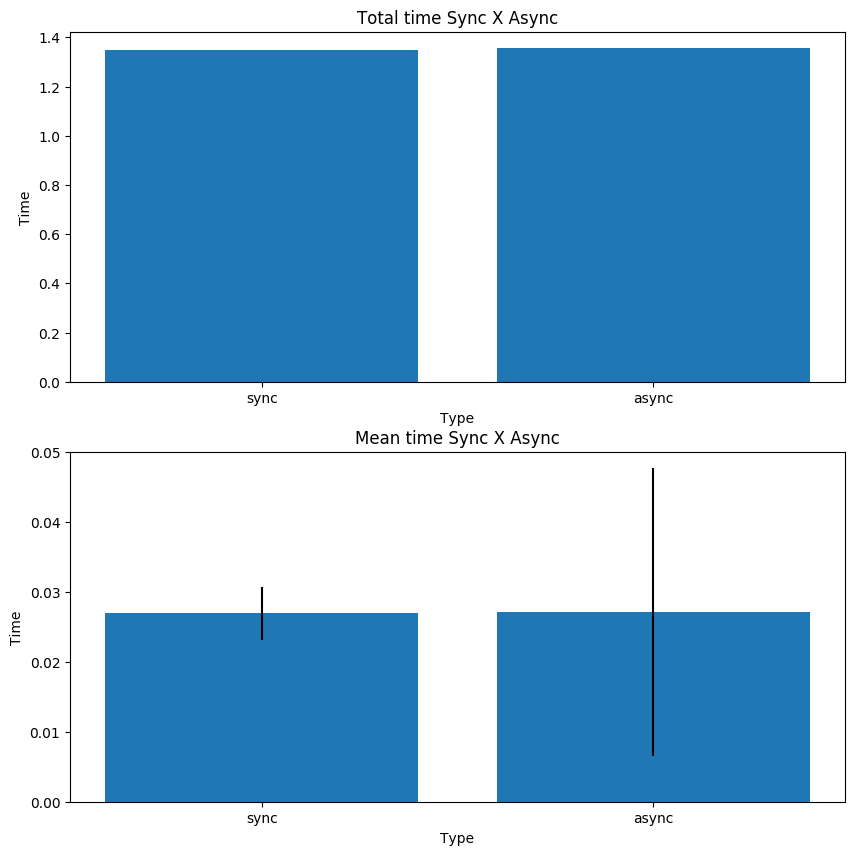

PyObject <matplotlib.text.Text object at 0x7fd147ff31d0>

In [12]:
################
##  Bar Plot  ##
################

Pkg.add("PyPlot")
using PyPlot
# ioff() # Interactive plotting OFF, necessary for inline plotting in IJulia

#Total time Bar Plot
fig = figure("pyplot_barplot",figsize=(10,10))
subplot(211)
b = bar(["sync","async"],[sync_B_mc_total_time,assync_B_mc_total_time])
axis("tight")
title("Total time Sync X Async")
grid("off")
xlabel("Type")
ylabel("Time")

#Mean time Bar Plot with confidence interval 95%
subplot(212)
b2 = bar(["sync","async"],[sync_mean_value,assync_mean_value],yerr=[sync_margin_value,assync_margin_value])
axis("tight")
title("Mean time Sync X Async")
grid("off")
xlabel("Type")
ylabel("Time")
# gcf() # Needed for IJulia to plot inline

In [10]:
println("Assync Total Time")
println(assync_B_mc_total_time)

Assync Total Time
0.340499901


In [12]:
println("Sync Total Time")
println(sync_B_mc_total_time)

Sync Total Time
3.2958339220000004


 
* Qual das duas versões teve o menor tempo de execução? Por quê?

**Resposta**: _A versão assíncrona teve um melhor desempenho. Porque nessa versão existe a possibilidade de execução de processos em paralelo, logo implica num menor tempo de execução._



### Exercício 3: Análise de desempenho do R-multicast (3,0 pontos)

Implemente duas versões do algoritmo R-multicast: uma assíncrona e outra síncrona.

_Código de simulação de mensagens recebidas por cada um dos processos_

In [25]:
# init memory (list) of message received of each process
msg_received = Dict()
g = workers()
for p in g
    msg_received[p] = ASCIIString[]
end

* R-multicast síncrono

In [26]:
#R-multicast synchronous
function R_mc_sync(g, m, R_deliver)
    for p in g
        if m in msg_received[p] # check duplicate
            remotecall_wait(p, R_deliver, m)
        else  # confirm reception sending to everyone in the group
            push!(msg_received[p], m)
            R_mc_sync(g, m, R_deliver)
        end
    end
end

R_mc_sync (generic function with 1 method)

* R-multicast assíncrono

In [15]:
#R-multicast asynchronous
function R_mc_assync(g, m, R_deliver)
    for p in g
        if m in msg_received[p]  # check duplicate
            remotecall(p, R_deliver, m)
        else  # confirm reception sending to everyone in the group
            push!(msg_received[p], m)  
            R_mc_assync(g, m, R_deliver)
        end
    end
end

R_mc_assync (generic function with 1 method)

Faça a mesma análise de desempenho para o R-multicast que você fez no Exercício 2.

In [27]:
sync_R_mc = measureTime(R_mc_sync)

sync_mean_value = mean(sync_R_mc)
sync_sd_value = stdm(sync_R_mc, sync_mean_value)
sync_margin_value = 1.96*(sync_sd_value/sqrt(50))

sync_max_value_ci = sync_mean_value + sync_margin_value
println(sync_max_value_ci)
sync_min_value_ci = sync_mean_value - sync_margin_value
println(sync_min_value_ci)

sync_R_mc_total_time = sum(sync_R_mc)

print("Assync Total Time >>>> ")
println(assync_R_mc_total_time)

Interaction 1
	From worker 3:	oi!
	From worker 3:	oi!
	From worker 4:	oi!
	From worker 3:	oi!
	From worker 4:	oi!
	From worker 5:	oi!
	From worker 3:	oi!
	From worker 4:	oi!
	From worker 5:	oi!
	From worker 6:	oi!
	From worker 3:	oi!
	From worker 4:	oi!
	From worker 5:	oi!
	From worker 6:	oi!
	From worker 7:	oi!
	From worker 3:	oi!
	From worker 4:	oi!
	From worker 5:	oi!
	From worker 6:	oi!
	From worker 7:	oi!
	From worker 8:	oi!
	From worker 3:	oi!
	From worker 4:	oi!
	From worker 5:	oi!
	From worker 6:	oi!
	From worker 7:	oi!
	From worker 8:	oi!
	From worker 9:	oi!
	From worker 3:	oi!
	From worker 4:	oi!
	From worker 5:	oi!
	From worker 6:	oi!
	From worker 7:	oi!
	From worker 8:	oi!
	From worker 9:	oi!
	From worker 11:	oi!
	From worker 3:	oi!
	From worker 4:	oi!
	From worker 5:	oi!
	From worker 6:	oi!
	From worker 7:	oi!
	From worker 8:	oi!
	From worker 9:	oi!
	From worker 11:	oi!
	From worker 14:	oi!
	From worker 3:	oi!
	From worker 4:	oi!
	From worker 5:	oi!
	From worker 6:	oi!
	Fr

	From worker 24:	oi!
	From worker 27:	oi!
	From worker 28:	oi!
	From worker 31:	oi!
	From worker 33:	oi!
	From worker 34:	oi!
	From worker 35:	oi!
	From worker 39:	oi!
	From worker 41:	oi!
	From worker 14:	oi!
	From worker 15:	oi!
	From worker 16:	oi!
	From worker 17:	oi!
	From worker 18:	oi!
	From worker 19:	oi!
	From worker 20:	oi!
	From worker 22:	oi!
	From worker 23:	oi!
	From worker 24:	oi!
	From worker 27:	oi!
	From worker 28:	oi!
	From worker 31:	oi!
	From worker 33:	oi!
	From worker 34:	oi!
	From worker 35:	oi!
	From worker 39:	oi!
	From worker 41:	oi!
	From worker 11:	oi!
	From worker 14:	oi!
	From worker 15:	oi!
	From worker 16:	oi!
	From worker 17:	oi!
	From worker 18:	oi!
	From worker 19:	oi!
	From worker 20:	oi!
	From worker 22:	oi!
	From worker 23:	oi!
	From worker 24:	oi!
	From worker 27:	oi!
	From worker 28:	oi!
	From worker 31:	oi!
	From worker 33:	oi!
	From worker 34:	oi!
	From worker 35:	oi!
	From worker 39:	oi!
	From worker 41:	oi!
	From worker 9:	oi!
	From worker 1

elapsed time: 0.006154321 seconds
Interaction 13
	From worker 3:	oi!
	From worker 4:	oi!
	From worker 5:	oi!
	From worker 6:	oi!
	From worker 7:	oi!
	From worker 8:	oi!
	From worker 9:	oi!
	From worker 11:	oi!
	From worker 14:	oi!
	From worker 15:	oi!
	From worker 16:	oi!
	From worker 17:	oi!
	From worker 18:	oi!
	From worker 19:	oi!
	From worker 20:	oi!
	From worker 22:	oi!
	From worker 23:	oi!
	From worker 24:	oi!
	From worker 27:	oi!
	From worker 28:	oi!
	From worker 31:	oi!
	From worker 33:	oi!
	From worker 34:	oi!
	From worker 35:	oi!
	From worker 39:	oi!
	From worker 41:	oi!
elapsed time: 0.005537546 seconds
Interaction 14
	From worker 3:	oi!
	From worker 4:	oi!
	From worker 5:	oi!
	From worker 6:	oi!
	From worker 7:	oi!
	From worker 8:	oi!
	From worker 9:	oi!
	From worker 11:	oi!
	From worker 14:	oi!
	From worker 15:	oi!
	From worker 16:	oi!
	From worker 17:	oi!
	From worker 18:	oi!
	From worker 19:	oi!
	From worker 20:	oi!
	From worker 22:	oi!
	From worker 23:	oi!
	From worker 

	From worker 17:	oi!
	From worker 18:	oi!
	From worker 19:	oi!
	From worker 20:	oi!
	From worker 22:	oi!
	From worker 23:	oi!
	From worker 24:	oi!
	From worker 27:	oi!
	From worker 28:	oi!
	From worker 31:	oi!
	From worker 33:	oi!
	From worker 34:	oi!
	From worker 35:	oi!
	From worker 39:	oi!
	From worker 41:	oi!
elapsed time: 0.073718079 seconds
Interaction 31
	From worker 3:	oi!
	From worker 4:	oi!
	From worker 5:	oi!
	From worker 6:	oi!
	From worker 7:	oi!
	From worker 8:	oi!
	From worker 9:	oi!
	From worker 11:	oi!
	From worker 14:	oi!
	From worker 15:	oi!
	From worker 16:	oi!
	From worker 17:	oi!
	From worker 18:	oi!
	From worker 19:	oi!
	From worker 20:	oi!
	From worker 22:	oi!
	From worker 23:	oi!
	From worker 24:	oi!
	From worker 27:	oi!
	From worker 28:	oi!
	From worker 31:	oi!
	From worker 33:	oi!
	From worker 34:	oi!
	From worker 35:	oi!
	From worker 39:	oi!
	From worker 41:	oi!
elapsed time: 0.00711162 seconds
Interaction 32
	From worker 3:	oi!
	From worker 4:	oi!
	From wor

	From worker 35:	oi!
	From worker 39:	oi!
	From worker 41:	oi!
elapsed time: 0.006994523 seconds
Interaction 48
	From worker 3:	oi!
	From worker 4:	oi!
	From worker 5:	oi!
	From worker 6:	oi!
	From worker 7:	oi!
	From worker 8:	oi!
	From worker 9:	oi!
	From worker 11:	oi!
	From worker 14:	oi!
	From worker 15:	oi!
	From worker 16:	oi!
	From worker 17:	oi!
	From worker 18:	oi!
	From worker 19:	oi!
	From worker 20:	oi!
	From worker 22:	oi!
	From worker 23:	oi!
	From worker 24:	oi!
	From worker 27:	oi!
	From worker 28:	oi!
	From worker 31:	oi!
	From worker 33:	oi!
	From worker 34:	oi!
	From worker 35:	oi!
	From worker 39:	oi!
	From worker 41:	oi!
elapsed time: 0.005664452 seconds
Interaction 49
	From worker 3:	oi!
	From worker 4:	oi!
	From worker 5:	oi!
	From worker 6:	oi!
	From worker 7:	oi!
	From worker 8:	oi!
	From worker 9:	oi!
	From worker 11:	oi!
	From worker 14:	oi!
	From worker 15:	oi!
	From worker 16:	oi!
	From worker 17:	oi!
	From worker 18:	oi!
	From worker 19:	oi!
	From worker 

In [28]:
assync_R_mc = measureTime(R_mc_assync)

assync_mean_value = mean(assync_R_mc)
assync_sd_value = stdm(assync_R_mc, assync_mean_value)
assync_margin_value = 1.96*(assync_sd_value/sqrt(50))

asasync_max_value_ci = assync_mean_value + assync_margin_value
println(assync_max_value_ci)
assync_min_value_ci = assync_mean_value - assync_margin_value
println(assync_min_value_ci)

assync_R_mc_total_time = sum(assync_R_mc)

print("Assync Total Time >>>> ")
println(assync_R_mc_total_time)

Interaction 1
	From worker 3:	oi!
	From worker 4:	oi!
	From worker 6:	oi!
	From worker 8:	oi!
	From worker 5:	oi!
	From worker 7:	oi!
	From worker 9:	oi!
	From worker 14:	oi!
	From worker 11:	oi!
	From worker 18:	oi!
	From worker 23:	oi!
	From worker 22:	oi!
	From worker 28:	oi!
	From worker 35:	oi!
elapsed time: 0.002938277 seconds
Interaction 2
	From worker 34:	oi!
	From worker 31:	oi!
	From worker 4:	oi!
	From worker 6:	oi!
	From worker 20:	oi!
	From worker 33:	oi!
	From worker 14:	oi!
	From worker 7:	oi!
	From worker 39:	oi!
	From worker 9:	oi!
	From worker 8:	oi!
elapsed time: 0.00147563 seconds
Interaction 3
	From worker 19:	oi!oi!
	From worker 19:	
	From worker 24:	oi!oi!
	From worker 24:	
	From worker 3:	oi!oi!
	From worker 3:	
	From worker 27:	oi!oi!
	From worker 27:	
	From worker 5:	oi!oi!
	From worker 5:	
	From worker 17:	oi!oi!oi!
	From worker 17:	
	From worker 17:	
	From worker 41:	oi!oi!
	From worker 41:	
elapsed time: 0.001419605 seconds	From worker 16:	oi!oi!oi!

	From 

	From worker 19:	oi!
	From worker 20:	oi!
	From worker 22:	oi!
	From worker 23:	oi!
	From worker 24:	oi!
	From worker 27:	oi!
	From worker 28:	oi!
	From worker 31:	oi!
	From worker 33:	oi!
	From worker 34:	oi!
	From worker 35:	oi!
	From worker 39:	oi!
elapsed time: 	From worker 41:	oi!
0.008764449 seconds
Interaction 19
	From worker 3:	oi!
	From worker 4:	oi!
	From worker 5:	oi!
	From worker 6:	oi!
	From worker 7:	oi!
	From worker 8:	oi!
	From worker 9:	oi!
	From worker 11:	oi!
	From worker 14:	oi!
	From worker 15:	oi!
	From worker 16:	oi!
	From worker 17:	oi!
	From worker 18:	oi!
	From worker 19:	oi!
	From worker 20:	oi!
	From worker 22:	oi!
	From worker 23:	oi!
	From worker 24:	oi!
	From worker 27:	oi!
	From worker 28:	oi!
	From worker 31:	oi!
	From worker 33:	oi!
	From worker 34:	oi!
	From worker 35:	oi!
	From worker 39:	oi!
elapsed time: 	From worker 41:	oi!
0.00374034 seconds
Interaction 20
	From worker 3:	oi!
	From worker 4:	oi!
	From worker 5:	oi!
	From worker 6:	oi!
	From worke

elapsed time: 	From worker 41:	oi!
0.006164449 seconds
Interaction 36
	From worker 4:	oi!
	From worker 5:	oi!
	From worker 6:	oi!
	From worker 7:	oi!
	From worker 8:	oi!
	From worker 9:	oi!
	From worker 11:	oi!
	From worker 14:	oi!
	From worker 15:	oi!
	From worker 16:	oi!
	From worker 3:	oi!
	From worker 17:	oi!
	From worker 18:	oi!
	From worker 19:	oi!
	From worker 20:	oi!
	From worker 22:	oi!
	From worker 23:	oi!
	From worker 24:	oi!
	From worker 28:	oi!
	From worker 27:	oi!
	From worker 31:	oi!
	From worker 33:	oi!
	From worker 34:	oi!
	From worker 35:	oi!
	From worker 39:	oi!
elapsed time: 	From worker 41:	oi!
0.004287434 seconds
Interaction 37
	From worker 3:	oi!
	From worker 4:	oi!
	From worker 5:	oi!
	From worker 6:	oi!
	From worker 7:	oi!
	From worker 8:	oi!
	From worker 9:	oi!
	From worker 11:	oi!
	From worker 14:	oi!
	From worker 15:	oi!
	From worker 16:	oi!
	From worker 17:	oi!
	From worker 18:	oi!
	From worker 19:	oi!
	From worker 20:	oi!
	From worker 22:	oi!
	From worker 

In [21]:
print("Sync Total Time >>>> ")
println(sync_R_mc_total_time)

print("Assync Total Time >>>> ")
println(assync_R_mc_total_time)

Sync Total Time >>>> 1.4541487290000004
Assync Total Time >>>> 0.641225571


**Gráfico**:
    

INFO: Nothing to be done
INFO: METADATA is out-of-date — you may not have the latest version of PyPlot
INFO: Use `Pkg.update()` to get the latest versions of your packages


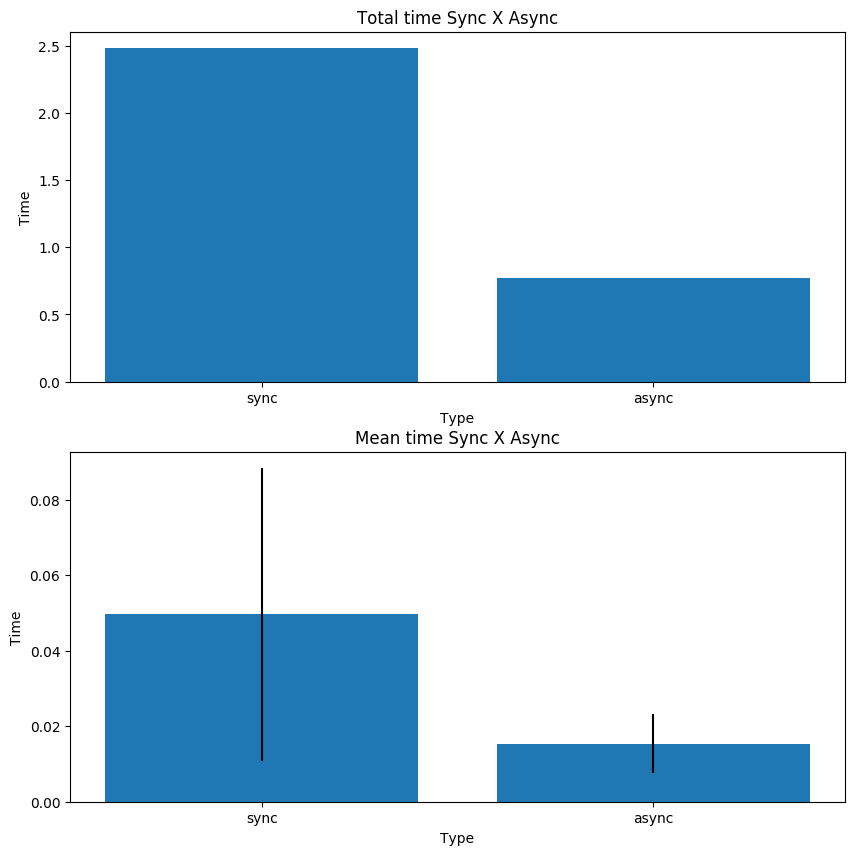

PyObject <matplotlib.text.Text object at 0x7fd0e2b05190>

In [18]:
################
##  Bar Plot  ##
################

Pkg.add("PyPlot")
using PyPlot
# ioff() # Interactive plotting OFF, necessary for inline plotting in IJulia

#Total time Bar Plot
fig = figure("pyplot_barplot",figsize=(10,10))
subplot(211)
b = bar(["sync","async"],[sync_R_mc_total_time,assync_R_mc_total_time])
axis("tight")
title("Total time Sync X Async")
grid("off")
xlabel("Type")
ylabel("Time")

#Mean time Bar Plot with confidence interval 95%
subplot(212)
b2 = bar(["sync","async"],[sync_mean_value,assync_mean_value],yerr=[sync_margin_value,assync_margin_value])
axis("tight")
title("Mean time Sync X Async")
grid("off")
xlabel("Type")
ylabel("Time")
# gcf() # Needed for IJulia to plot inline

* Qual das duas versões (R-multicast assíncrono e assíncrono) teve o menor tempo de execução? Por quê?

**Resposta**: _A versão assíncrona teve o melhor desempenho, pois mesmo com as checagens e modificações adicionadas, porque é feita de forma mais eficiente a checagem de recebimento, além disso ocorrer a múltipla execução simultânea. Além do mais existe a execução em paralelo de diversos processos._



### Exercício 4: Análise de desempenho: B-multicast vs. R-multicast (3,0 pontos)

Para cada uma das comparações abaixo, qual dos algoritmos teve o menor tempo de execução? Por quê?

* B-multicast assíncrono vs. R-multicast assíncrono.
    
    

In [23]:
print("Assync B multicast total time >>>> ")
println(assync_B_mc_total_time)

print("Assync R multicast total time >>>> ")
println(assync_R_mc_total_time)

Assync B multicast total time >>>> 1.3549560179999998
Assync R multicast total time >>>> 0.641225571


    
**Resposta**: _R-multicast mais eficiente._    
    
* B-multicast síncrono vs. R-multicast síncrono.

In [33]:
print("Sync B multicast total time >>>> ")
println(sync_B_mc_total_time)

print("Sync R multicast total time >>>> ")
println(sync_R_mc_total_time)

Sync B multicast total time >>>> 1.447541754
Sync R multicast total time >>>> 2.0982638259999997


**Resposta**: _B-multicast mais eficiente._    

## Entrega

As respostas deverão ser entregues nos devidos campos desse arquivo, ou seja, em [Markdown](https://en.wikipedia.org/wiki/Markdown) e no formato [IJulia Notebook](https://github.com/JuliaLang/IJulia.jl).

O programa deve ser implementado na linguagem de programação **Julia**. Seu trabalho será testado na [JuliaBox](https://juliabox.com), portanto teste seu arquivo IJulia na JulizBox antes de enviá-lo.


### Forma 

O arquivo IJulia Notebook deverá ser entregue ao Professor **exclusivamente através do Google Classroom**.



A responsabilidade sobre a integridade do arquivo contendo trabalho é exclusivamente dos discentes. Serão ignorados os trabalhos cujos arquivos não conseguirem ser abertos pelo Professor.

### Prazos

O prazo de entrega sem atraso é o dia **18/11/17**.

Trabalhos entregues com atraso serão aceitos, no máximo, até o o dia **19/11/17**. Serão descontados 5% da nota obtida por dia de atraso.


## Pontuação extra

O(a) discente que realizar mais tarefas, além do que foi especificado neste trabalho, o professor atribuirá de 0,5 a 1,0 ponto extra a depender da relevância da contribuição no programa. O critério será decidido pelo professor. 

O(a) discente deve indicar qual é a tarefa executada. Por exemplo, adição de funcionalidades, armazenamento de dados em arquivo, documentação de código, comentários em inglês sem erros ortográficos, etc.


**Plágio** A nota zero será atribuída caso haja qualquer tipo de cópia parcial ou integral assim como as devidas medidas legais. Leia a [cartilha sobre plágio](http://www.noticias.uff.br/arquivos/cartilha-sobre-plagio-academico.pdf).

## Disclaimer

Esse material foi elaborado pelo [Prof. André Lage Freitas](https://sites.google.com/a/ic.ufal.br/andrelage/) e está licenciado sob a licença _GNU General Public License v3.0_.